___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices.

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

**Imports**

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

We do this using pandas_datareader 


In [3]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2018,1,1)

BAC = data.DataReader("BAC",'morningstar',start,end)
BAC = BAC.reset_index(level=0, drop=True)

C = data.DataReader("C",'morningstar',start,end)
C = C.reset_index(level=0, drop=True)

GS = data.DataReader("GS",'morningstar',start,end)
GS = GS.reset_index(level=0, drop=True)

JPM = data.DataReader("JPM",'morningstar',start,end)
JPM = JPM.reset_index(level=0, drop=True)

MS = data.DataReader("MS",'morningstar',start,end)
MS = MS.reset_index(level=0, drop=True)

WFC = data.DataReader("WFC",'morningstar',start,end)
WFC = WFC.reset_index(level=0, drop=True)

In [4]:
#DataFrame Structure 
WFC.head()

,Close,High,Low,Open,Volume
Date,,,,,
2006-01-02,31.415,31.535,31.215,31.415,0
2006-01-03,31.900,31.975,31.195,31.600,11015000
2006-01-04,31.530,31.820,31.365,31.800,10594000
2006-01-05,31.495,31.555,31.310,31.500,9927600
2006-01-06,31.680,31.775,31.385,31.580,8324000


** Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [5]:
tickers = 'BAC C GS JPM MS WFC'
tickers = tickers.split() 
tickers.sort()

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [6]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)
bank_stocks

BAC                                        C            \
            Close   High     Low   Open     Volume   Close      High   
Date                                                                   
2006-01-02  46.15  46.36  45.910  46.02          0  485.30  487.1000   
2006-01-03  47.08  47.18  46.150  46.92   16197900  492.90  493.8000   
2006-01-04  46.58  47.24  46.450  47.00   17427400  483.80  491.0000   
2006-01-05  46.64  46.83  46.320  46.58   14668900  486.20  487.8000   
2006-01-06  46.57  46.91  46.350  46.80   11965700  486.20  489.0000   
2006-01-09  46.60  46.97  46.360  46.72   15536300  483.90  487.4000   
2006-01-10  46.21  46.51  45.880  46.40   15507500  485.40  485.5000   
2006-01-11  46.10  46.25  45.750  46.06   14562000  489.80  495.8000   
2006-01-12  45.80  46.23  45.710  46.22   10394900  490.30  491.0000   
2006-01-13  45.80  46.00  45.680  45.83   10742100  489.20  491.9000   
2006-01-16  45.80  46.00  45.680  45.83          0  489.20  491.9000   
2006-01-17  45.31  45.58  45.000  45.40   14550200  484.30  487.0000   
2006-01-18  45.26  45.65  44.920  45.32   10843900  483.60  486.7000   
2006-01-19  45.14  45.88  44.850  45.88   14294900  479.40  485.8000   
2006-01-20  44.19  45.15  44.170  45.00   24930500  456.90  474.0000   
2006-01-23  43.96  44.39  43.490  43.50   23160700  460.00  463.8000   
2006-01-24  44.24  44.68  44.040  44.08   13314800  460.10  463.6000   
2006-01-25  44.63  44.65  44.150  44.15   14566300  462.30  463.7000   
2006-01-26  44.90  45.16  44.670  45.00   16044200  470.10  475.5000   
2006-01-27  44.80  45.11  44.610  44.90   12121400  468.70  473.7000   
2006-01-30  44.48  45.35  44.250  44.75   14450200  468.20  469.9000   
2006-01-31  44.23  44.73  44.120  44.65   16895700  465.80  470.5000   
2006-02-01  43.95  44.24  43.860  44.10   15794500  463.30  467.2000   
2006-02-02  43.44  43.97  43.370  43.95   14302900  451.80  461.0000   
2006-02-03  43.09  43.55  42.750  43.30   17017100  450.60  456.1000   
2006-02-06  43.37  43.65  43.240  43.40   12224200  451.70  456.1000   
2006-02-07  43.49  43.87  43.460  43.60   13831200  450.50  453.8000   
2006-02-08  43.72  43.72  43.550  43.55   12564600  453.60  455.3000   
2006-02-09  43.83  44.05  43.700  43.75   13495700  457.90  461.0000   
2006-02-10  43.92  44.02  43.410  43.77    9030900  459.60  460.7000   
...           ...    ...     ...    ...        ...     ...       ...   
2017-11-21  26.73  26.86  26.690  26.80   57749094   72.38   72.5900   
2017-11-22  26.66  26.90  26.590  26.77   38103201   72.26   73.1500   
2017-11-23  26.66  26.66  26.660  26.66          0   72.26   72.2600   
2017-11-24  26.59  26.74  26.570  26.72   14273573   72.02   72.5200   
2017-11-27  26.59  26.92  26.510  26.52   44828641   71.39   72.3600   
2017-11-28  27.64  27.70  26.565  26.62   99765018   73.70   74.0000   
2017-11-29  28.28  28.49  27.840  28.02  119728368   75.04   75.7700   
2017-11-30  28.17  28.72  28.080  28.62  122131900   75.50   76.8893   
2017-12-01  28.10  28.51  27.500  28.25  137774781   75.51   76.2400   
2017-12-04  29.06  29.31  28.820  28.85  145661692   77.10   77.9200   
2017-12-05  28.93  29.30  28.850  29.27   91349782   76.54   77.2800   
2017-12-06  28.64  28.97  28.570  28.73   74593807   75.44   76.5000   
2017-12-07  28.78  28.97  28.370  28.45   80706146   74.98   75.3200   
2017-12-08  29.05  29.09  28.760  29.08   60991334   75.71   75.7200   
2017-12-11  28.94  29.17  28.900  29.05   54001895   75.85   76.1300   
2017-12-12  29.32  29.50  28.910  29.05   76017169   76.15   76.8000   
2017-12-13  28.84  29.44  28.830  29.31   79980564   75.14   76.3150   
2017-12-14  28.73  29.18  28.710  29.06   60615822   73.92   75.4305   
2017-12-15  29.04  29.18  28.740  28.91  129859355   74.77   75.1500   
2017-12-18  29.48  29.50  29.270  29.29   70548609   75.67   76.0050   
2017-12-19  29.45  29.64  29.370  29.60   67984139   74.70   76.1500   
2017-12-20  29.48  29.84  29.450  29.76   81271224   7

** Setting the column name levels**

In [7]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks

Bank Ticker    BAC                                        C            \
Stock Info   Close   High     Low   Open     Volume   Close      High   
Date                                                                    
2006-01-02   46.15  46.36  45.910  46.02          0  485.30  487.1000   
2006-01-03   47.08  47.18  46.150  46.92   16197900  492.90  493.8000   
2006-01-04   46.58  47.24  46.450  47.00   17427400  483.80  491.0000   
2006-01-05   46.64  46.83  46.320  46.58   14668900  486.20  487.8000   
2006-01-06   46.57  46.91  46.350  46.80   11965700  486.20  489.0000   
2006-01-09   46.60  46.97  46.360  46.72   15536300  483.90  487.4000   
2006-01-10   46.21  46.51  45.880  46.40   15507500  485.40  485.5000   
2006-01-11   46.10  46.25  45.750  46.06   14562000  489.80  495.8000   
2006-01-12   45.80  46.23  45.710  46.22   10394900  490.30  491.0000   
2006-01-13   45.80  46.00  45.680  45.83   10742100  489.20  491.9000   
2006-01-16   45.80  46.00  45.680  45.83          0  489.20  491.9000   
2006-01-17   45.31  45.58  45.000  45.40   14550200  484.30  487.0000   
2006-01-18   45.26  45.65  44.920  45.32   10843900  483.60  486.7000   
2006-01-19   45.14  45.88  44.850  45.88   14294900  479.40  485.8000   
2006-01-20   44.19  45.15  44.170  45.00   24930500  456.90  474.0000   
2006-01-23   43.96  44.39  43.490  43.50   23160700  460.00  463.8000   
2006-01-24   44.24  44.68  44.040  44.08   13314800  460.10  463.6000   
2006-01-25   44.63  44.65  44.150  44.15   14566300  462.30  463.7000   
2006-01-26   44.90  45.16  44.670  45.00   16044200  470.10  475.5000   
2006-01-27   44.80  45.11  44.610  44.90   12121400  468.70  473.7000   
2006-01-30   44.48  45.35  44.250  44.75   14450200  468.20  469.9000   
2006-01-31   44.23  44.73  44.120  44.65   16895700  465.80  470.5000   
2006-02-01   43.95  44.24  43.860  44.10   15794500  463.30  467.2000   
2006-02-02   43.44  43.97  43.370  43.95   14302900  451.80  461.0000   
2006-02-03   43.09  43.55  42.750  43.30   17017100  450.60  456.1000   
2006-02-06   43.37  43.65  43.240  43.40   12224200  451.70  456.1000   
2006-02-07   43.49  43.87  43.460  43.60   13831200  450.50  453.8000   
2006-02-08   43.72  43.72  43.550  43.55   12564600  453.60  455.3000   
2006-02-09   43.83  44.05  43.700  43.75   13495700  457.90  461.0000   
2006-02-10   43.92  44.02  43.410  43.77    9030900  459.60  460.7000   
...            ...    ...     ...    ...        ...     ...       ...   
2017-11-21   26.73  26.86  26.690  26.80   57749094   72.38   72.5900   
2017-11-22   26.66  26.90  26.590  26.77   38103201   72.26   73.1500   
2017-11-23   26.66  26.66  26.660  26.66          0   72.26   72.2600   
2017-11-24   26.59  26.74  26.570  26.72   14273573   72.02   72.5200   
2017-11-27   26.59  26.92  26.510  26.52   44828641   71.39   72.3600   
2017-11-28   27.64  27.70  26.565  26.62   99765018   73.70   74.0000   
2017-11-29   28.28  28.49  27.840  28.02  119728368   75.04   75.7700   
2017-11-30   28.17  28.72  28.080  28.62  122131900   75.50   76.8893   
2017-12-01   28.10  28.51  27.500  28.25  137774781   75.51   76.2400   
2017-12-04   29.06  29.31  28.820  28.85  145661692   77.10   77.9200   
2017-12-05   28.93  29.30  28.850  29.27   91349782   76.54   77.2800   
2017-12-06   28.64  28.97  28.570  28.73   74593807   75.44   76.5000   
2017-12-07   28.78  28.97  28.370  28.45   80706146   74.98   75.3200   
2017-12-08   29.05  29.09  28.760  29.08   60991334   75.71   75.7200   
2017-12-11   28.94  29.17  28.900  29.05   54001895   75.85   76.1300   
2017-12-12   29.32  29.50  28.910  29.05   76017169   76.15   76.8000   
2017-12-13   28.84  29.44  28.830  29.31   79980564   75.14   76.3150   
2017-12-14   28.73  29.18  28.710  29.06   60615822   73.92   75.4305   
2017-12-15   29.04  29.18  28.740  28.91  129859355   74.77   75.1500   
2017-12-18   29.48  29.50  29.270  29.29   70548609   75.67   76.0050   
2017-12-19   29.45  29.64  29.370  29.60   67984139   74.7

______________________________________________________________________________________________________________________





# Data Visulization

Exploring the data a bit using Mutli-Level Indexing and '.xs'! 


** The Max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs('Close',level=1,axis=1).max()

Bank Ticker
BAC     54.9000
C      564.1000
GS     261.0100
JPM    107.8300
MS      74.1294
WFC     61.6100
dtype: float64

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

** Using the pandas pct_change() method on the Close column to create a column representing this return value..**

In [10]:
for i in tickers: 
    returns[i+ ' Returns'] = bank_stocks[i]['Close'].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-03,0.020152,0.015660,0.009083,0.012598,0.027670,0.015438
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874


** Creating a pairplot using seaborn on the returns dataframe.**

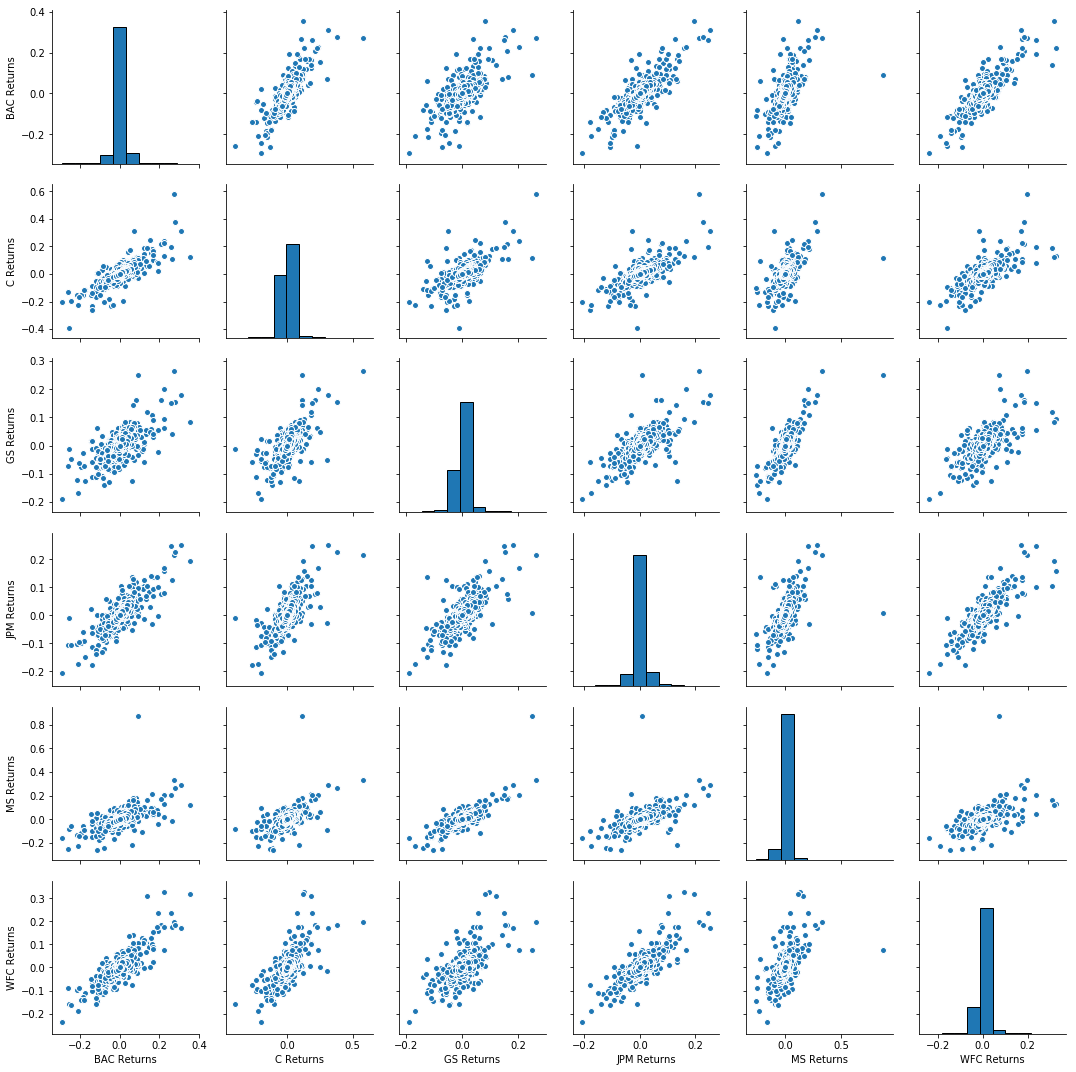

In [11]:
import seaborn as sns
#sns.pairplot(returns[1:])
g = sns.pairplot(returns[1:],diag_kws=dict(edgecolor="k"))

** The Dates the each bank stock had the best and worst single day returns.**

In [12]:
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

** We notice that 4 out of the 6 stocks, had their worst day on January 20th, 2009. What happened this day? ** 

Inauguration of President Obama. 

In [13]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

** We notice that Morgan Stanley had its best and worst day returns, very close to the same day. October 9th - 13th ** 

Morgan Stanley suffered heavely on short shelling on its stock due to rumors that the Japanese bank **Mitsubishi UFJ** might pull out their investment in MS. 

In [14]:
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

** Taking a look at the standard deviation of the returns, we can classify which stock would the riskiest over the entire time period. The riskiest for the year 2008.**

In [15]:
returns.std() #Morgan Stanley is definitely the most volatile stock, thus the riskiest 

BAC Returns    0.033570
C Returns      0.035276
GS Returns     0.023540
JPM Returns    0.025408
MS Returns     0.034517
WFC Returns    0.027628
dtype: float64

In [16]:
returns[returns.index.year==2008].std() #We notice that Morgan Stanley is still the riskest in 2008.

BAC Returns    0.061903
C Returns      0.072312
GS Returns     0.049248
JPM Returns    0.052384
MS Returns     0.086081
WFC Returns    0.051528
dtype: float64

** Creating a distplot using seaborn of the 2008 returns for Morgan Stanley **

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


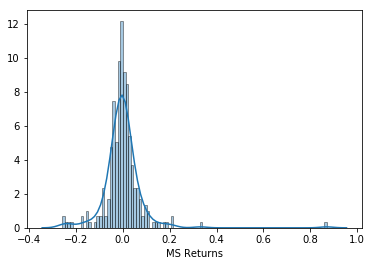

In [17]:
sns.distplot(returns['MS Returns'][returns.index.year==2008],hist_kws=dict(edgecolor='k'),bins=100) 

** A distplot using seaborn of the 2008 returns for CitiGroup **

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


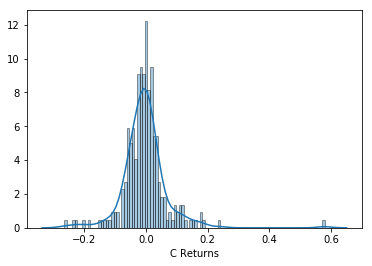

In [18]:
sns.distplot(returns['C Returns'][returns.index.year==2008],hist_kws=dict(edgecolor='k'),bins=100)


____
# More Visualization

A lot of this project will focus on visualizations. 

### Imports

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly as ply
ply.tools.set_credentials_file(username='Blackshek', api_key='imj7pgs96nRqqofJriyQ')
import cufflinks as cf
cf.go_online()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

In [20]:
bank_stocks.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12,  1],
           dtype='int64', name='Date', length=3131)

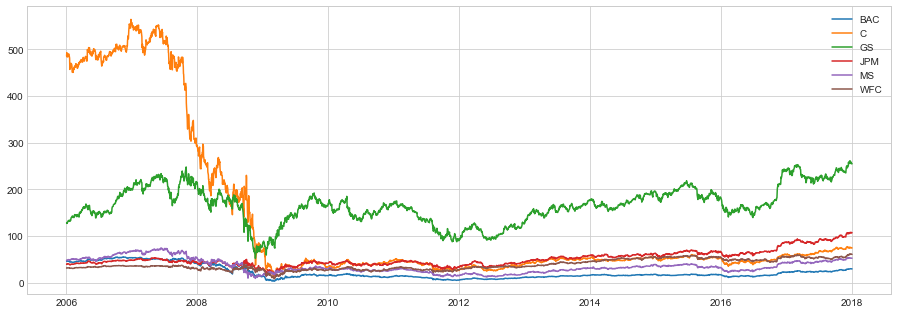

In [21]:
fig = plt.figure() 
axis = fig.add_axes([0,0,2,1])
for i in tickers:
    axis.plot(bank_stocks[i]['Close'],label=i)
axis.legend()


In [22]:
# plotly - more interactive
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

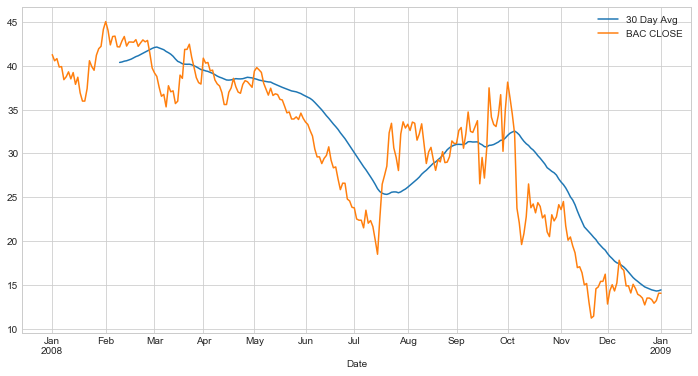

In [24]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

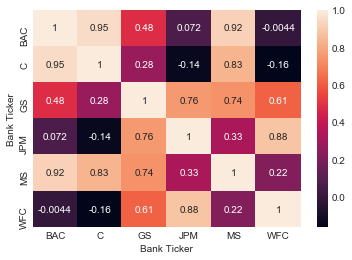

In [25]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

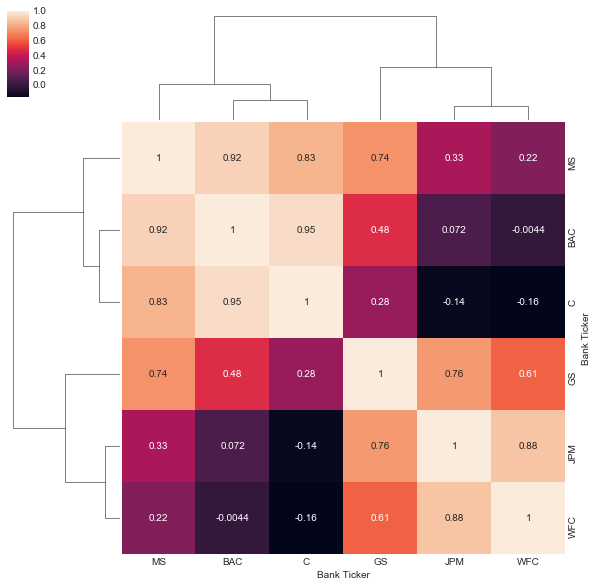

In [26]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [27]:
#Another way 
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots.

**Graphing a Candlestick Plot of Bank of America stock**

**Very Interactive plot. Can highlight any range on graph to get a closer look**

In [83]:

trace = ply.graph_objs.Candlestick(x=BAC.index,
                       open=BAC.Open.values,
                       high=BAC.High.values,
                       low=BAC.Low.values,
                       close=BAC.Close.values)
data = [trace]

layout = ply.graph_objs.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)

fig = ply.graph_objs.Figure(data=data,layout=layout)
ply.plotly.iplot(data)

** Using .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [85]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [87]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll', title='Bollinger Band Plot')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.